In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pickle
df_stemmed_bn = pd.read_pickle('df_stemmed_bn.pkl')
data = pd.read_pickle('NewspaperBD.pkl')

In [ ]:
df_stemmed_bn

,Text_en,Text_bn,text_en_clean,text_en_clean_2,text_en_clean_3,text_en_clean_4
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা। স্বাস্থ্য...,একদিন কোভিড এর সর্বোচ্চ সংখ্যা স্বাস্থ্য সেবা ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,"[সর্বোচ্চ, স্বাস্থ্য, অধিদপ্তর, মহাপরিচালক, ডি..."
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",চাকরি থেকে ছিটকে পড়ে টাঙ্গাইল চামচাম নির্মাতা...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,"[টাঙ্গাইল, চামচাম, নির্মাতা, প্রাদুর্ভাব, লকডা..."
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -19 শাটডাউন মোকাবেলা: 200 পরিবার উদ্যানে...,কোভিড শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা অর...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,"[শাটডাউন, মোকাবেলা, পরিবার, উদ্যান, সুবিধা, মা..."
3,"7 family members, 4 police personnel test posi...",বগুড়ার কোভিড -১৯ এর জন্য পরিবারের family সদস্...,বগুড়া কোভিড এর জন্য পরিবার সদস্য জন পুলিশ সদস...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,"[বগুড়া, পরিবার, পজিটিভ, পরীক্ষা, কমপক্ষ, বোগু..."
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,"[করোনাভাইরাস, স্বাস্থ্য, মন্ত্রনালয়, সরকারি, ..."
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,লাফিয় বাড়ছে আক্রান্ত ও মৃতের সংখ্যা চীনে করোনা...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,"[সংক্রমণ, নজিরবিহীন, প্রতিরোধমূলক, ব্যবস্থা, স..."
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,করোনাভাইরাস আতঙ্ক যাত্রী ফেরত দিয়েছে ভারত করোন...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,"[করোনাভাইরাস, যাত্রী, করোনাভাইরাস, পাসপোর্ট, ন..."
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয় আনার নির্দেশ ...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,"[নির্দেশ, প্রধানমন্ত্রী, হাসিনা, মারাত্মক, করো..."
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল রুম চা...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,"[করোনাভাইরাস, স্বাস্থ্য, অধিদপ্তর, কন্ট্রোল, ক..."


In [ ]:
data

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category,Dominant Topic
0,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 ho...,Nineteen people -- the highest number in 24 ho...,Statistics,NaN,6
1,https://www.thedailystar.net/country/news/thro...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...","Thrown out of job, Tangail’s chamcham makers p...",Around 1000 workers engaged in producing chamc...,As the chamcham shops are closed due to the lo...,COVID-19 Effects,Global economic impact of Corona virus,3
2,https://www.thedailystar.net/country/news/copi...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,Coping with Covid-19 Shutdown: 200 families re...,Family squabbles were becoming all too common ...,"The volunteer students, under the banner 'Sabu...",Social Information,Social impact,0
3,https://www.thedailystar.net/country/news/7-fa...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...","7 family members, 4 police personnel test posi...",At least eleven people tested positive for cor...,At least eleven people tested positive for cor...,COVID-19 Effects,Positive patient symptoms and identification,7
4,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,Coronavirus: Health ministry issues 13 directi...,In an effort to contain the spread of coronovi...,In an effort to contain the spread of coronovi...,Government Announcement and responses,"Government guidelines, instructions and mobili...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,Statistics,NaN,5
15561,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,International Information,Repatriation,5
15562,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 18:06:00,Narayanganj,Dhaka,Bangladesh,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ,Instructions to bring back the Bangladeshis tr...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,International Information,Repatriation,8
15563,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-26 18:01:00,Narayanganj,Dhaka,Bangladesh,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,Coronavirus: Control room opened in the Depart...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,Government Announcement and responses,"Government guidelines, instructions and mobili...",4


In [ ]:
df = pd.DataFrame(columns = ['article', 'label'])

In [ ]:
df['article'] = df_stemmed_bn['text_en_clean_3'].copy()
df['label'] = data['Dominant Topic'].copy()

In [ ]:
df

,article,label
0,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,6
1,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,3
2,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,0
3,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,7
4,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,1
...,...,...
15560,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,5
15561,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,5
15562,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,8
15563,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  15565 non-null  object
 1   label    15565 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 243.3+ KB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15565 entries, 0 to 15564
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  15565 non-null  object
 1   label    15565 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 364.8+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(columns=['index'])

In [ ]:
df.head(50)

,article,label
0,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,6
1,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,3
2,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,0
3,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,7
4,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,1
5,হাসিনা মহিউদ্দিন ইতিবাচক পরীক্ষা করেছেন প্রয়া...,4
6,সুরক্ষা নির্দেশনা নিশ্চিত বঙ্গবাজার করোনাভাইরা...,1
7,করোনাভাইরাস প্রাদুর্ভাব বাংলাদেশকে সরবরাহ মহাম...,1
8,গাজীপুর এক্সিকিউটিভ ইঞ্জিনিয়ার অবস্থায় পাওয়...,3
9,চাটোগ্রাম পারিবারিক পরীক্ষা ইতিবাচক চট্টগ্রাম ...,7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 1000
# This is fixed.
EMBEDDING_DIM = 200
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(df.article.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
X = tokenizer.texts_to_sequences((df.article.values))
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14322, 1000)


In [ ]:
Y = pd.get_dummies(df.label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14322, 9)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 200)         10000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1000, 200)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 10,121,309
Trainable params: 10,121,309
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X.shape

(14322, 1000)

In [ ]:
Y.shape

(14322, 9)

In [ ]:
epochs = 5
batch_size = 32

history = model.fit(
    train_features, 
    train_labels, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', 
                             patience=3, 
                             min_delta=0.0001)]
                    ) 



Epoch 1/5
363/363 [==============================] - 1825s 5s/step - loss: 1.2646 - accuracy: 0.5852 - f1_m: 0.5169 - precision_m: 0.6868 - recall_m: 0.4255 - val_loss: 0.9516 - val_accuracy: 0.6695 - val_f1_m: 0.6444 - val_precision_m: 0.7951 - val_recall_m: 0.5476
Epoch 2/5
363/363 [==============================] - 1784s 5s/step - loss: 0.6552 - accuracy: 0.7966 - f1_m: 0.7809 - precision_m: 0.8595 - recall_m: 0.7188 - val_loss: 0.7127 - val_accuracy: 0.7673 - val_f1_m: 0.7662 - val_precision_m: 0.8199 - val_recall_m: 0.7210
Epoch 3/5
363/363 [==============================] - 1745s 5s/step - loss: 0.3709 - accuracy: 0.8896 - f1_m: 0.8868 - precision_m: 0.9165 - recall_m: 0.8598 - val_loss: 0.7223 - val_accuracy: 0.7766 - val_f1_m: 0.7777 - val_precision_m: 0.8213 - val_recall_m: 0.7397
Epoch 4/5
363/363 [==============================] - 1734s 5s/step - loss: 0.1830 - accuracy: 0.9475 - f1_m: 0.9464 - precision_m: 0.9577 - recall_m: 0.9358 - val_loss: 0.7229 - val_accuracy: 0.8099 

In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.2f}\n  Accuracy: {:0.2f}'.format(accr[0],accr[1]))

45/45 [==============================] - 17s 376ms/step - loss: 0.8421 - accuracy: 0.7955 - f1_m: 0.7967 - precision_m: 0.8137 - recall_m: 0.7810
Test set
  Loss: 0.84
  Accuracy: 0.80


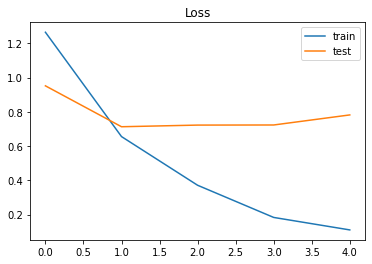

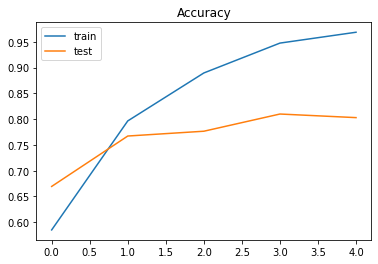

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_features,test_labels)
#print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
print('Loss : ')
print(loss)
print('Accuracy : ')
print(accuracy)
print('F1 score : ')
print(f1_score)
print('Precision : ')
print(precision)
print('Recall : ')
print(recall)

SyntaxError: ignored

In [ ]:
model.save_weights('bengali_news_model.h5')

In [ ]:
# news = ["""‘বন্ধুত্ব’ করিয়ে দেওয়ার টোপ দিয়ে টাকা হাতানোর অভিযোগে ১৬ জনকে গ্রেফতার করল কলকাতা পুলিশের সাইবার ক্রাইম থানা। ধৃতদের মধ্যে ন’জন পুরুষ এবং সাতজন মহিলা। তাদের মঙ্গলবার ব্যাঙ্কশাল আদালতে তোলা হলে বিচারক ১৫ মে পর্যন্ত পুলিশি হেফাজতের নির্দেশ দিয়েছেন।\
#     পুলিশ জানিয়েছে, অভিযুক্তেরা বিভিন্ন সংবাদপত্রে ‘এসকর্ট সার্ভিসে’র বিজ্ঞাপন দিত। মহিলাদের সঙ্গে ‘বন্ধুত্ব’ করে লোভনীয় উপার্জনের হাতছানি থাকত সেইসব বিজ্ঞাপনে। এই কাজের জন্য গাড়ি করে নিয়ে যাওয়া এবং বাড়িতে পৌঁছে দেওয়ার ব্যবস্থাও আছে বলে লেখা থাকত সেখানে। যোগাযোগের জন্য দু’টি মোবাইল নম্বরও দেওয়া থাকত। ওই নম্বরে যোগাযোগ করলে ব্যাঙ্ক অ্যাকাউন্টে একাধিকবার বিভিন্ন খাতে টাকা জমা দিতে বলা হতো।
#     অ্যাকাউন্টে টাকা পৌঁছে গেলেই সাইবার ক্রাইম থানার পুলিশ আধিকারিক পরিচয় দিয়ে প্রতারণাচক্রের এক ব্যক্তি ফোন করত সংশ্লিষ্ট আবেদনকারীকে। ফোনে গ্রেফতারির হুমকির পাশাপাশি, ২০ হাজার টাকা দাবি করা হতো বলে অভিযোগ। \
#     এই প্রতারণাচক্রের খপ্পরে পড়া মুচিপাড়া এলাকার এক বাসিন্দা এপ্রিল মাসে পুলিশের কাছে অভিযোগ দায়ের করেছিলেন। অভিযোগের ভিত্তিতে তদন্ত করতে গিয়ে কসবার রাজডাঙায় একটি ফ্ল্যাটের সন্ধান মেলে। সোমবার রাতে সেখানে হানা দিয়ে অভিযুক্তদের গ্রেফতার করা হয়। ধৃতদের কাছ থেকে ৫৩টি মোবাইল ফোন, ৭৫টি সিম কার্ড, দু’টি কর্ডলেস ফোন, একাধিক রাবার স্ট্যাম্প এবং একটি গাড়ি বাজেয়াপ্ত করেছে পুলিশ।  
#        """]
# seq = tokenizer.texts_to_sequences(news)
# padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
# pred = model.predict(padded)
# labels = ['entertainment', 'national', 'sports', 'kolkata', 'state','international', 'sport', 'nation', 'world', 'travel']
# label = pred, labels[np.argmax(pred)]
# print("News Label Is: ")
# print(label[1])